In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from numpy import linalg as LA

In [2]:
data = pd.read_csv("./USArrests.csv")

In [4]:
feats= data.columns[1:]
print(feats)

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')


In [46]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,1.242564,0.782839,-0.520907,-0.003416
1,Alaska,0.507862,1.106823,-1.211764,2.484203
2,Arizona,0.071633,1.478803,0.998980,1.042878
3,Arkansas,0.232349,0.230868,-1.073593,-0.184917
4,California,0.278268,1.262814,1.758923,2.067820


## Normalize the columns to $\mu_i = 0, \sigma^2_i=1$

In [5]:
data[feats]=(data[feats]-data[feats].mean())/data[feats].std()

In [158]:
covMatr = np.array(data[feats].cov())
w, v = LA.eig(covMatr)


In [159]:
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]

In [160]:
print(w)
print(v)

[2.48024158 0.98976515 0.35656318 0.17343009]
[[ 0.53589947  0.41818087 -0.34123273  0.6492278 ]
 [ 0.58318363  0.1879856  -0.26814843 -0.74340748]
 [ 0.27819087 -0.87280619 -0.37801579  0.13387773]
 [ 0.54343209 -0.16731864  0.81777791  0.08902432]]


In [40]:
phi1 = v[:,0]
phi2 = -v[:,1]

In [41]:
def project(a,b):
    return np.dot(a,b)/(np.sqrt(np.dot(a,a)))

In [94]:
newCoords = []
names= []
for index, row in data.iterrows():
#    print row['c1'], row['c2']
    vect = (row[feats].values)
#     newCoords.append([project(phi1,vect),project(phi2,vect),row["Unnamed: 0"]])
    newCoords.append([project(phi1,vect),project(phi2,vect)])
    names.append(row["Unnamed: 0"])
newCoords = np.array(newCoords)

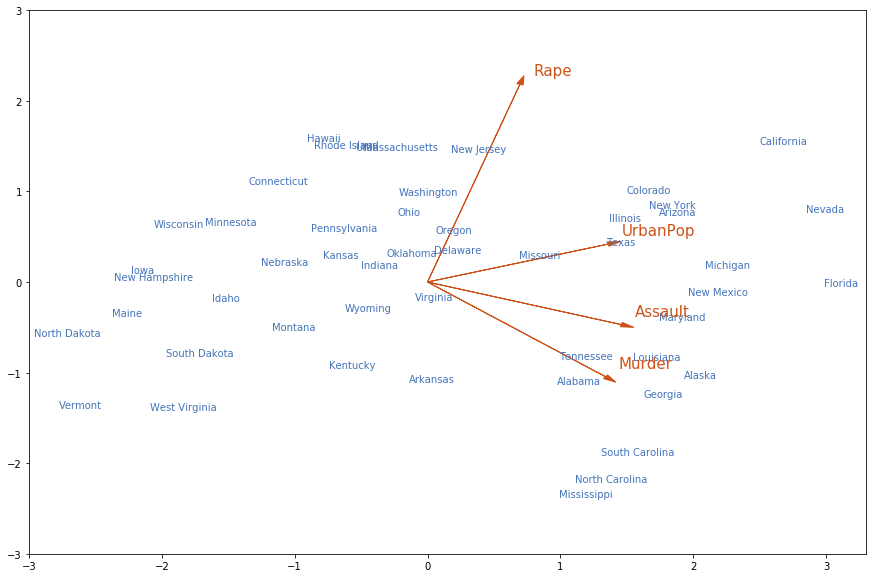

In [109]:
fig = plt.figure(figsize=(15,10))
for i in range(len(names)):
    plt.text(newCoords[:,0][i],newCoords[:,1][i],names[i],fontsize = 10,color="#4574BA")
plt.xlim(-3,3.3)
plt.ylim(-3,3)
scalingFactor = 2.5
names1 = ['Murder','Assault','Rape','UrbanPop']
for i in range(len(phi1)):
#     print(phi1[i],phi2[i])
    plt.arrow(0, 0, phi1[i]*scalingFactor, phi2[i]*scalingFactor, head_width=0.05, head_length=0.1, ec='#CD5218',fc='#CD5218')
    plt.text(phi1[i]*scalingFactor + 0.1,phi2[i]*scalingFactor+0.1,names1[i],color='#CD5218',fontsize=15)

In [152]:
def pve(m,v,data):
    ans = 0
    assert(len(data.columns)==len(v[:,0]))
    return sum(data.dot(v[:,m])**2)/len(data)
def totVar(v,data):
    ans =0
    for i in range(len(data.columns)):
        ans+= sum(data.iloc[:,i]**2)/len(data)
    return ans

In [153]:
covMatr

array([[1.        , 0.80187331, 0.06957262, 0.56357883],
       [0.80187331, 1.        , 0.2588717 , 0.66524123],
       [0.06957262, 0.2588717 , 1.        , 0.41134124],
       [0.56357883, 0.66524123, 0.41134124, 1.        ]])

In [154]:
pve(0,v,data[feats])

2.430636747566503

In [155]:
totVar(v,data[feats])

3.92

In [161]:
PVE = []
for i in range(len(data[feats].columns)):
    PVE.append(pve(i,v,data[feats])/totVar(v,data[feats]))

(0, 1.1)

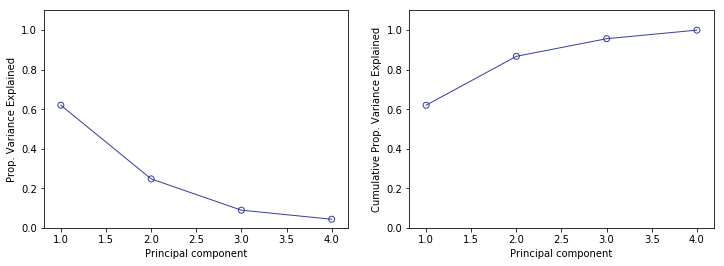

In [186]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot([1,2,3,4],PVE,linewidth = 1,c="#373F9E")
plt.scatter([1,2,3,4],PVE,linewidth = 1,edgecolors='#373F9E', facecolors='none')
plt.xlabel("Principal component")
plt.ylabel("Prop. Variance Explained")
plt.ylim(0,1.1)


PVE= np.array(PVE)
cumulativePVE = np.cumsum(PVE)


plt.subplot(1,2,2)
plt.plot([1,2,3,4],cumulativePVE,linewidth = 1,c='#373F9E')
plt.scatter([1,2,3,4],cumulativePVE,linewidth = 1,edgecolors='#373F9E', facecolors='none')
plt.xlabel("Principal component")
plt.ylabel("Cumulative Prop. Variance Explained")
plt.ylim(0,1.1)